# **Top Games on Google Play Store**

Project of Ray Christofer

**Exploratory data analysis**

# Overview


*  This Notebook aimed to use Exploratory data analysis to further explore the data and make our analysis based on that

*   This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs. Data as of Jun 9, 2021.

*   This dataset is consist of 'Top games' in Google Playstore which means most of the games has high rating

*   The dataset can be downloaded here https://www.kaggle.com/dhruvildave/top-play-store-games
```





# Data Preparation

In [1]:
# Importing Library

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import average


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import our data 
path = '/content/drive/MyDrive/Data/android-games.csv'
df = pd.read_csv(path)

In [3]:
# Check our data set
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
df.info()

# Install should be an int or float data type not an object data type as it is number of times the games installed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [ ]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [ ]:
df.nunique()

rank                 100
title               1675
total ratings       1699
installs               9
average rating         3
growth (30 days)     186
growth (60 days)     206
price                  6
category              17
5 star ratings      1697
4 star ratings      1692
3 star ratings      1677
2 star ratings      1653
1 star ratings      1686
paid                   2
dtype: int64

In [ ]:
df.price.value_counts(normalize=True)
# 99% of our data is Free games. 
# We should just drop all the paid games altogether and focus on the free games

0.00    0.995954
1.99    0.001734
7.49    0.000578
2.99    0.000578
1.49    0.000578
0.99    0.000578
Name: price, dtype: float64

In [ ]:
df.isnull().sum()

# We don't have any missing value in this dataset

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

**Summary**

*   Our data set has 1730 rows and 15 columns.
*   The install is only milestones instead of actual number of istallation
*   Install is identified as obj type as it followed with M and K in the dataset
*   Most of the games (over 99%) are free 
*   The games is already ranked by google play 

# Data Cleaning

In [33]:
# Dropping both paid and price column

df = df[df.price == 0]

In [34]:
df.drop("paid", axis=1, inplace=True)


In [35]:
df.drop("price", axis=1, inplace=True)

In [100]:
df.info()

# Now we have 1723 rows and 12 column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  1687 non-null   int64  
 1   title                 1687 non-null   object 
 2   total ratings         1687 non-null   int64  
 3   installs_in_million   1687 non-null   float64
 4   average rating        1687 non-null   int64  
 5   growth (30 days)      1687 non-null   float64
 6   growth (60 days)      1687 non-null   float64
 7   category              1687 non-null   object 
 8   5 star ratings        1687 non-null   int64  
 9   4 star ratings        1687 non-null   int64  
 10  3 star ratings        1687 non-null   int64  
 11  2 star ratings        1687 non-null   int64  
 12  1 star ratings        1687 non-null   int64  
 13  weighted_avg_ratings  1687 non-null   float64
 14  weighted_avg ratings  1687 non-null   float64
dtypes: float64(5), int64(

In [37]:
# Handling install feature

# 1. Change the one with K into million scale

def in_thousand(install):
    if install == '500.0 k':
        return '0.5 M'
    elif install == '100.0 k':
        return '0.1 M'
    else:
        return install

In [38]:
#2 Apply number in thousand
df['installs']= df['installs'].apply(in_thousand)


In [39]:
# 3. Remove the M and assign the data as float data type 
df['installs']= df['installs'].str.replace( 'M', '').str.strip().astype('float')


In [40]:
# 4. Rename install column with install in million
df= df.rename(columns={'installs': 'installs_in_million'})
df['installs_in_million'].value_counts()

10.0      789
50.0      243
5.0       236
100.0     201
1.0       189
0.5        13
500.0      12
1000.0      2
0.1         2
Name: installs_in_million, dtype: int64

In [41]:
# Check for duplicate
df.duplicated().sum()

0

In [42]:
# Checking further
df.duplicated(subset=['average rating','1 star ratings', '2 star ratings','3 star ratings', '4 star ratings', '5 star ratings']).sum()

# There are duplicates 30 of them

4

In [43]:
df.loc[df.duplicated(subset=['average rating','1 star ratings', '2 star ratings','3 star ratings', '4 star ratings', '5 star ratings']), :]

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,weighted_avg_ratings
464,51,Solitaire,164757,5.0,4,0.1,0.1,GAME CARD,136067,21789,6870,2356,5811,4.847284
511,90,Solitaire,102434,10.0,4,4.7,13.1,GAME CARD,90322,9155,3306,1009,2979,4.911894
1656,30,Word Search,390612,50.0,4,0.1,0.1,GAME WORD,278658,96142,40301,11592,28847,4.994194
1708,80,Word Search,149858,10.0,4,0.0,0.1,GAME WORD,106127,23103,11207,5583,15262,4.558289


In [44]:
df.drop_duplicates(subset=['average rating','1 star ratings', '2 star ratings','3 star ratings', '4 star ratings', '5 star ratings'], keep = 'first')


,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,weighted_avg_ratings
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,4.216242
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,4.304169
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,4.126485
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,4.265578
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,4.329448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0,4,0.9,1.8,GAME WORD,101036,3607,3237,1229,3297,4.760106
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0,4,0.9,2.3,GAME WORD,88950,14856,4297,1385,2103,4.677073
1727,98,Scrabble® GO - New Word Game,110723,10.0,4,0.9,1.9,GAME WORD,64184,18332,9385,6688,12132,4.045329
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0,4,1.9,4.1,GAME WORD,99987,4766,1469,953,2353,4.817539


# Data Analysis

In [91]:
# Measuring the weighted average ratings

weighted_avg_ratings =(df['1 star ratings'] + 
                     df['2 star ratings'] *2 + 
                     df['3 star ratings']*3 + 
                     df['4 star ratings']*4 + 
                     df['5 star ratings']* 5) / df['total ratings']

In [92]:
# Inserting the weighted avg into the dataset
df['weighted_avg_ratings'] = round(weighted_avg_ratings,3)
df.head()

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,weighted_avg_ratings,weighted_avg ratings
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,4.216,4.216
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,4.304,4.304
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,4.126,4.126
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,4.266,4.266
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,4.329,4.329


In [89]:
df.groupby(['category']).agg({
    'weighted_avg_ratings':['mean','max','min']
})

# We found out that Card Game has the highest max weighted Average 17.667661, (Which is far beyond the maximum 5 stars possible ratings)
# It is also has the lowest Min value by far 1.166572. Although it is still possible this dataset is about top games in each category.
# And it is too low compared to other categories.

weighted_avg_ratings                    
                                  mean       max       min
category                                                  
GAME ACTION                   4.258138  4.674349  3.460132
GAME ADVENTURE                4.263949  4.738442  3.458765
GAME ARCADE                   4.287961  4.709666  3.629886
GAME BOARD                    4.330550  4.802068  3.163279
GAME CARD                     4.387195  4.911894  3.613126
GAME CASINO                   4.449550  4.818523  3.482112
GAME CASUAL                   4.346834  4.727496  3.535365
GAME EDUCATIONAL              4.253391  4.913950  3.724698
GAME MUSIC                    4.189206  4.665658  3.063274
GAME PUZZLE                   4.391758  4.864029  3.609036
GAME RACING                   4.302065  4.815572  3.501729
GAME ROLE PLAYING             4.292354  4.786239  3.686460
GAME SIMULATION               4.319693  4.690637  3.446893
GAME SPORTS                   4.258637  4.723759  2.681881
GAME STRATEGY                 4.264217  4.691230  3.524559
GAME TRIVIA                   4.283948  4.801698  3.166037
GAME WORD                     4.449463  4.994194  3.441081

In [93]:
df.sort_values('weighted_avg_ratings', ascending=False)[:10]
# Checking further the ratings with ascending and, 9 out of ten of solitaire game are having more than 5 stars possible ratings
# The top 3 also has the same amount of ratings for all the ratings which isn't possible.

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,weighted_avg_ratings,weighted_avg ratings
1656,30,Word Search,390612,50.0,4,0.1,0.1,GAME WORD,278658,96142,40301,11592,28847,4.994,4.994
745,20,超級單字王 - 英檢、多益、托福 輕鬆學,158721,0.5,4,0.6,1.1,GAME EDUCATIONAL,149917,6111,1435,358,897,4.914,4.914
511,90,Solitaire,102434,10.0,4,4.7,13.1,GAME CARD,90322,9155,3306,1009,2979,4.912,4.912
954,29,Indy Cat for VK,998983,5.0,4,0.0,0.0,GAME PUZZLE,931620,35619,10710,5345,15686,4.864,4.864
464,51,Solitaire,164757,5.0,4,0.1,0.1,GAME CARD,136067,21789,6870,2356,5811,4.847,4.847
576,51,Free Slot Machines with Bonus Games!,207326,5.0,4,0.2,0.5,GAME CASINO,189655,7941,3925,1388,4415,4.819,4.819
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0,4,1.9,4.1,GAME WORD,99987,4766,1469,953,2353,4.818,4.818
1688,61,Aplasta Palabras：Juego de Palabras Gratis sin ...,214313,10.0,4,17.1,5556.2,GAME WORD,189623,16387,4835,935,2530,4.818,4.818
1120,95,DATA WING,281769,5.0,4,0.3,0.5,GAME RACING,254416,15454,4525,2037,5334,4.816,4.816
810,85,Английский для Начинающих: LinDuo HD,55294,1.0,4,3.9,8.3,GAME EDUCATIONAL,47904,5419,1123,266,581,4.805,4.805


In [15]:
# Checking further of all the solitaire game 
df[df['title'].str.startswith('Solitaire')]

# There are still many games that have similar total ratings but different stars ratings.
# I will drop all the column that has the same name and total ratings now

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,weighted_avg_ratings
402,3,Solitaire,1590733,100.0 M,4,0.4,0.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,False,4.510663
410,8,Solitaire Grand Harvest,881563,10.0 M,4,3.1,5.8,0.0,GAME CARD,687097,115002,29330,13767,36364,False,4.591142
411,9,Solitaire TriPeaks: Play Free Solitaire Card G...,654922,10.0 M,4,1.1,2.1,0.0,GAME CARD,457634,120229,36631,12570,27855,False,4.476829
412,10,Solitaire,648068,50.0 M,4,0.0,0.0,0.0,GAME CARD,1117298,308402,82191,25750,57090,False,11.071772
418,13,Solitaire,507250,50.0 M,4,0.9,1.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,False,14.145414
427,19,Solitaire,406124,10.0 M,4,0.3,0.7,0.0,GAME CARD,1117298,308402,82191,25750,57090,False,17.667661
432,21,Solitaire,353226,10.0 M,4,0.1,0.2,0.0,GAME CARD,241310,65576,20366,8114,17858,False,4.427868
451,40,Solitaire TriPeaks Journey - Klondike Card Games,205537,5.0 M,4,1.6,3.4,0.0,GAME CARD,156282,28591,12716,3029,4918,False,4.597216
457,46,Solitaire Arena,177098,1.0 M,4,0.0,0.0,0.0,GAME CARD,121906,34850,10285,3125,6930,False,4.477549
459,48,Solitaire,172895,5.0 M,4,0.2,0.4,0.0,GAME CARD,136067,21789,6870,2356,5811,False,4.619127


In [14]:
df.drop_duplicates(subset=['title','total ratings', 'category'], inplace = True)
# Using more aggresive subset

In [17]:
# Dropping all the 'impossible' rating

df.drop(df.loc[df['weighted_avg_ratings']>5].index, inplace=True)

In [18]:
df['category'].value_counts()
# most category has the same amount of games
# After dropping duplicates, now all the category has equal numbers (100) except card games which shrink into 94

GAME ACTION          100
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME MUSIC           100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME WORD            100
GAME CARD             94
Name: category, dtype: int64

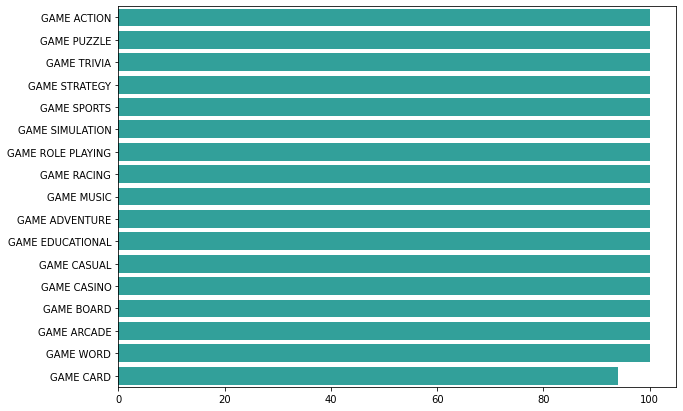

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(y = df.category.value_counts().index, x = df.category.value_counts().values, data = df,color='lightseagreen')

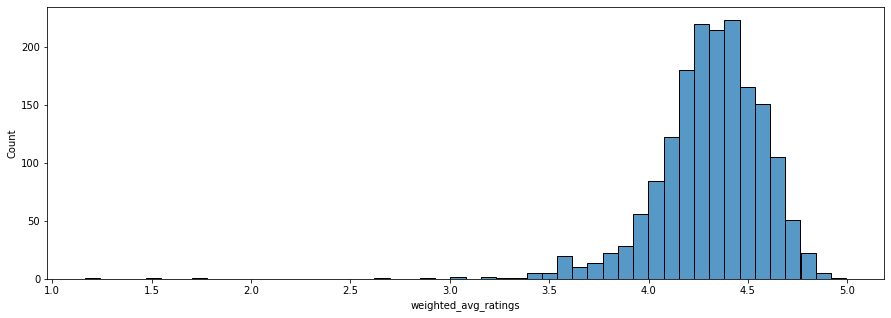

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="weighted_avg_ratings", bins = 50)

# After removing all the 'impossible' ratings it become negatively skewed.
# The distribution looks normal.

In [47]:
# Make a groupby and ordered by median
agg = df.groupby(['category']).agg({
    'weighted_avg_ratings':['median']})
median_idx = agg.apply(lambda x: x.sort_values(ascending=False))

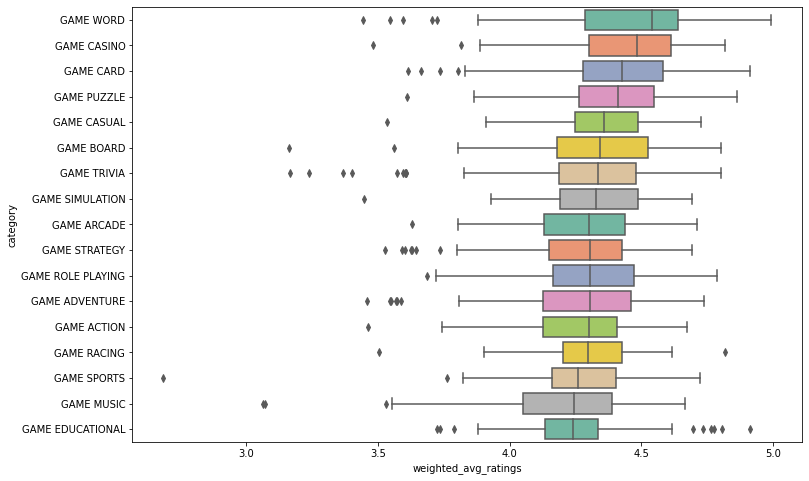

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x ="weighted_avg_ratings", y = 'category',  order=res.index,palette=sns.color_palette("Set2"))

# The boxplot show that game card has a lot of small ratings outlier
# The median ratings of all games hover between 4.2 - 4.6
# All of the games has some outlier in them, albeit some is a few(role playing game) and others has many (trivia and educational game)

In [28]:
# grouping the growth of each category games
growth = df.groupby("category")[["growth (30 days)", "growth (60 days)"]].mean()


In [29]:
plt.figure(figsize=(12,8))
fig = px.line(growth, y=["growth (30 days)", "growth (60 days)"],
             labels={"category": "Category", "value": "Total Growth"})
fig.show() 
# The casino game growth peak at the first 30 days, and didn't grow after.
# MOst of the game growth is on the first 30 days except game  board and startegy games which peak at the 60 days

<Figure size 864x576 with 0 Axes>

In [45]:
gb = df.groupby(['category'])['installs_in_million','total ratings'].sum().reset_index().sort_values('installs_in_million', ascending=False)
gb

,category,installs_in_million,total ratings
0,GAME ACTION,7410.0,401134360
2,GAME ARCADE,7150.0,174499598
6,GAME CASUAL,6397.0,247086604
10,GAME RACING,4675.0,113902680
9,GAME PUZZLE,3621.0,94669292
13,GAME SPORTS,3361.0,135382882
12,GAME SIMULATION,2771.0,93414165
14,GAME STRATEGY,2391.0,185656975
3,GAME BOARD,2123.0,44574307
1,GAME ADVENTURE,1803.0,89356174


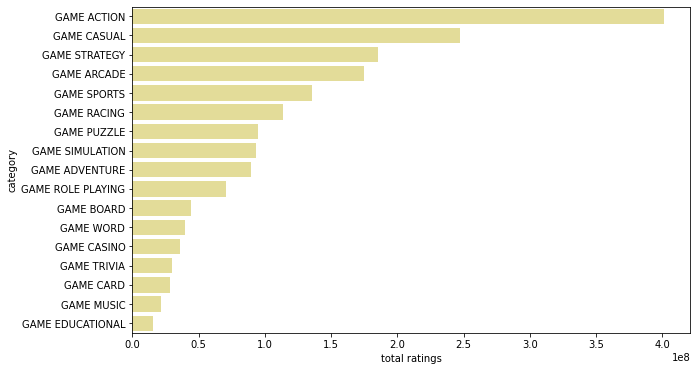

In [132]:
plt.figure(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x='total ratings', 
            y='category', 
            data=gb, order = gb.sort_values('total ratings', ascending = False).category, 
            color='khaki')

# The plot show that Action game lead the number of ratings given by far.
# This might be the result that most of this game player spent more hours than the others.

In [126]:
# Subset title, rank, category, installs, and weighted avg
dfa = df[['title','rank','category', 'total ratings','installs_in_million','weighted_avg_ratings']]

In [131]:
top_10 = dfa.sort_values(by='weighted_avg_ratings', ascending=False).head(10)
top_10
# Based on the weighted avg, Word Search has the highest score
# There are 3 games out of 10 that is a word game.

,title,rank,category,total ratings,installs_in_million,weighted_avg_ratings
1656,Word Search,30,GAME WORD,390612,50.0,4.994
745,超級單字王 - 英檢、多益、托福 輕鬆學,20,GAME EDUCATIONAL,158721,0.5,4.914
511,Solitaire,90,GAME CARD,102434,10.0,4.912
954,Indy Cat for VK,29,GAME PUZZLE,998983,5.0,4.864
464,Solitaire,51,GAME CARD,164757,5.0,4.847
576,Free Slot Machines with Bonus Games!,51,GAME CASINO,207326,5.0,4.819
1728,Word Nut: Word Puzzle Games & Crosswords,99,GAME WORD,109530,5.0,4.818
1688,Aplasta Palabras：Juego de Palabras Gratis sin ...,61,GAME WORD,214313,10.0,4.818
1120,DATA WING,95,GAME RACING,281769,5.0,4.816
810,Английский для Начинающих: LinDuo HD,85,GAME EDUCATIONAL,55294,1.0,4.805


In [130]:
top_10_ratings = dfa.sort_values(by='total ratings', ascending=False).head(10)
top_10_ratings 
# Garena Free Fire was one with with highest number of ratings given 
# Player of action games tend to vote/rate their games. Maybe because they tend to spend more hours on their game 

,title,rank,category,total ratings,installs_in_million,weighted_avg_ratings
0,Garena Free Fire- World Series,1,GAME ACTION,86273129,500.0,4.216
1426,Clash of Clans,1,GAME STRATEGY,55766763,500.0,4.499
1,PUBG MOBILE - Traverse,2,GAME ACTION,37276732,500.0,4.304
200,Subway Surfers,1,GAME ARCADE,35665901,1000.0,4.441
626,Candy Crush Saga,1,GAME CASUAL,31367945,1000.0,4.552
1427,Clash Royale,2,GAME STRATEGY,30852360,100.0,4.211
2,Mobile Legends: Bang Bang,3,GAME ACTION,26663595,100.0,4.126
100,Roblox,1,GAME ADVENTURE,21820451,100.0,4.415
1326,8 Ball Pool,1,GAME SPORTS,21632735,500.0,4.439
3,Brawl Stars,4,GAME ACTION,17971552,100.0,4.266


In [128]:
top_ranked_games = dfa[dfa['rank']<4]
top_ranked_games.head(30)

# This is the table to show the highest 3 rank games of each category.
# Only 2 games reached 1 billion install, which is Candy Crush and Subway surfers

,title,rank,category,total ratings,installs_in_million,weighted_avg_ratings
0,Garena Free Fire- World Series,1,GAME ACTION,86273129,500.0,4.216
1,PUBG MOBILE - Traverse,2,GAME ACTION,37276732,500.0,4.304
2,Mobile Legends: Bang Bang,3,GAME ACTION,26663595,100.0,4.126
100,Roblox,1,GAME ADVENTURE,21820451,100.0,4.415
101,Pokémon GO,2,GAME ADVENTURE,14541662,100.0,4.131
102,Criminal Case,3,GAME ADVENTURE,4273420,100.0,4.493
200,Subway Surfers,1,GAME ARCADE,35665901,1000.0,4.441
201,Hungry Shark Evolution - Offline survival game,2,GAME ARCADE,7202013,100.0,4.369
202,Geometry Dash Lite,3,GAME ARCADE,6960814,100.0,4.261
300,Ludo King™,1,GAME BOARD,7512316,500.0,4.252


# Conclusion


> Indented block

1.   This data is used for better understanding how the distribution and the ratings of the game works
2.   Action, adventure and casual games are the games that installed and given rating the most by users.
3.   The data has some limitations and make me unable to dig in further.
4   It would be nice if it has some feature as 'in app purchase' and hours of playing as it is more interesting feature to dig in deeper.
5.  I hope this help me or anyone who read this to better understand how data works,


